# Walmart Business Case Study - Confidence Interval and CLT

**Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

 The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

 **Dataset**

 The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

 - User_ID    :	User ID
 - Product_ID :	Product ID
 - Gender     :	Sex of User
 - Age        :	Age in bins
 - Occupation :	Occupation(Masked)
 - City_Category         :	Category of the City (A,B,C)
 - StayInCurrentCityYears:	Number of years stay in current city
 - Marital_Status        :	Marital Status
 - ProductCategory       :	Product Category (Masked)
 - Purchase              :	Purchase Amount
 
 **good looks**

- Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
- Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
Perform the same activity for Married vs Unmarried and Age
For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
Give recommendations and action items to Walmart.

 **Importing required packages**

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
from scipy import stats
import matplotlib.style as style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")


 **Loading data into Dataframe**

In [161]:
walmart_df = pd.read_csv('walmart_data.txt')
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


**Checking the structure & characteristics of the dataset**

In [165]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [166]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


**Changing datatype of Gender, Age,City Category, Marital Status, User_ID and Product_ID from Object to Category.**

In [168]:
cols = ['Gender', 'Age','Product_ID','City_Category','Marital_Status','User_ID']
for i in cols:
    walmart_df[i] = walmart_df[i].astype("category")
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 21.4+ MB


In [170]:
walmart_df.describe(include=['category'])

,User_ID,Product_ID,Gender,Age,City_Category,Marital_Status
count,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,3,2
top,1001680,P00265242,M,26-35,B,0
freq,1026,1880,414259,219587,231173,324731


In [171]:
walmart_df.describe(include=[np.object])

,Stay_In_Current_City_Years
count,550068
unique,5
top,1
freq,193821


In [181]:
walmart_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.000000,550068,550068,550068.0,550068.000000,550068.000000
unique,5891.0,3631,2,7,NaN,3,5,2.0,NaN,NaN
top,1001680.0,P00265242,M,26-35,NaN,B,1,0.0,NaN,NaN
freq,1026.0,1880,414259,219587,NaN,231173,193821,324731.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,NaN,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


In [173]:
walmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [174]:
len(walmart_df) *100

55006800

In [175]:
walmart_df.isnull().sum()/len(walmart_df) *100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [176]:
walmart_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [177]:
walmart_df.duplicated().sum()

0

# **Outliers detection**

In [178]:
walmart_df.describe()

,Occupation,Product_Category,Purchase
count,550068.000000,550068.000000,550068.000000
mean,8.076707,5.404270,9263.968713
std,6.522660,3.936211,5023.065394
min,0.000000,1.000000,12.000000
25%,2.000000,1.000000,5823.000000
50%,7.000000,5.000000,8047.000000
75%,14.000000,8.000000,12054.000000
max,20.000000,20.000000,23961.000000


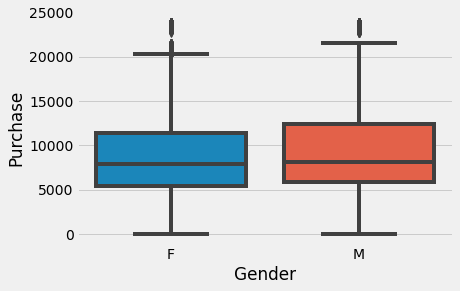

In [13]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = walmart_df)
plt.show()

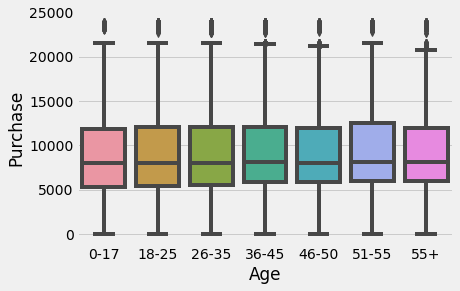

In [14]:
sns.boxplot(x = 'Age', y = 'Purchase', data = walmart_df)
plt.show()

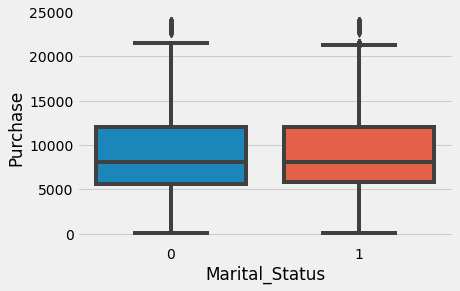

In [15]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = walmart_df)
plt.show()

**Observations**:
 - As we can see from above three boxplots of Gender, Age and Marital Status vs Purchase, the outliers even if they are present, they are not having any significant effect. Hence doing the analysis by keeping them.
 - With regards to null values, there are no null values found in the dataset.

 # EDA - Univariate Analysis

 **1.Numerical features**

In [16]:

def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax[0])
    ax[0].axvline(col_data.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median(),'Mode':col_data.mode()})
    
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [17]:
num_cols = walmart_df.select_dtypes('int64').columns.values
num_cols

array(['Occupation', 'Product_Category', 'Purchase'], dtype=object)

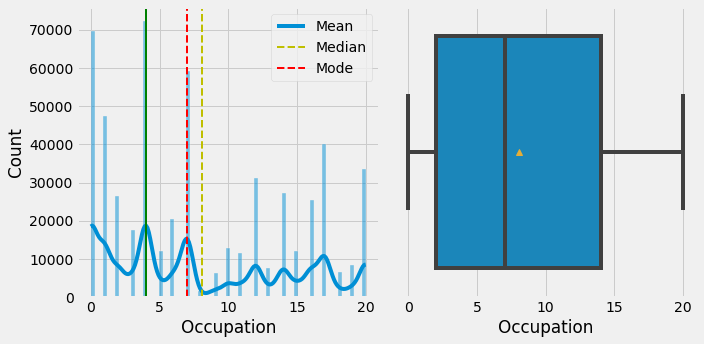

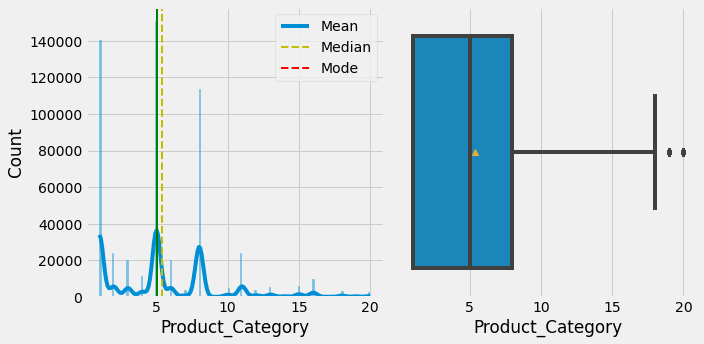

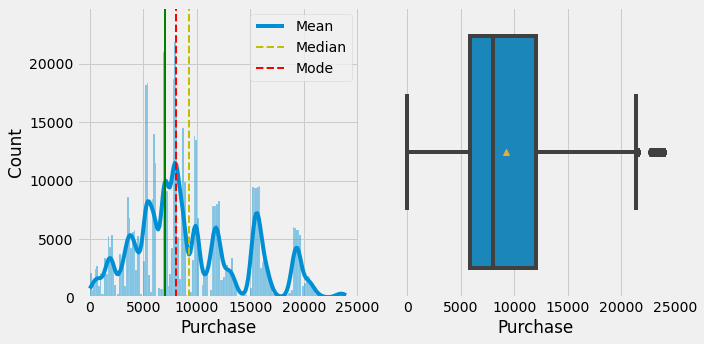

In [18]:
for i in num_cols:
    num_feat(walmart_df[i])

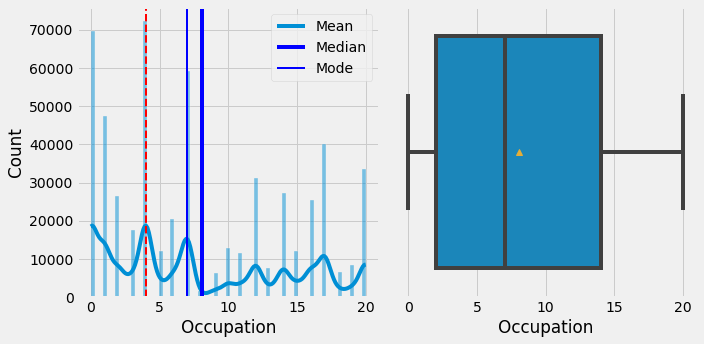

In [19]:
#Example
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(walmart_df['Occupation'], kde=True, ax=ax[0])
ax[0].axvline(walmart_df['Occupation'].mean(), color='b', linestyle='solid',linewidth=4)
ax[0].axvline(walmart_df['Occupation'].median(), color='b', linestyle='solid', linewidth=2)
ax[0].axvline(walmart_df['Occupation'].mode()[0],color='r',linestyle='dashed',linewidth=2)
ax[0].legend({'Mean':walmart_df['Occupation'].mean(),'Median':walmart_df['Occupation'].median(),'Mode':walmart_df['Occupation'].mode()})

sns.boxplot(x=walmart_df['Occupation'], showmeans=True, ax=ax[1])
plt.tight_layout()

**Observations**:
 - As we can clearly see that, there are few outliers for Product Category and Purchase.
 - For purchase, the distribution is clearly not a normal distribution. So with the help of CLT we need to plot a distribution of sampling means in order to draw some insights.

 **2.Catagorical features:**

In [20]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 21.4+ MB


In [21]:
cat_cols = walmart_df.select_dtypes('category').columns.values
cat_cols

array(['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category',
       'Marital_Status'], dtype=object)

**1.Gender**

In [22]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' Wise Sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

In [23]:
# walmart_df.Product_ID.value_counts()
walmart_df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

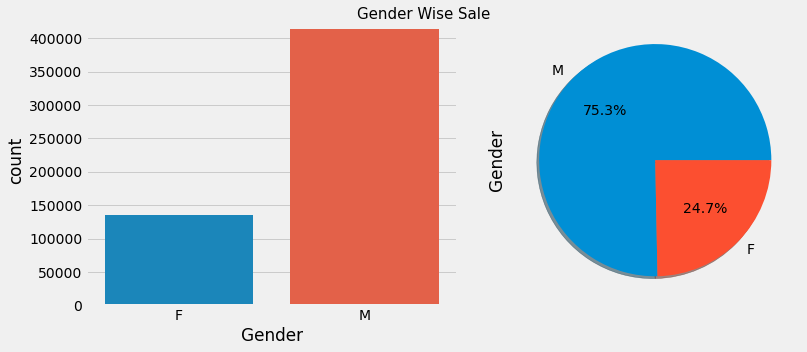

In [24]:
cat_feat(walmart_df['Gender'])

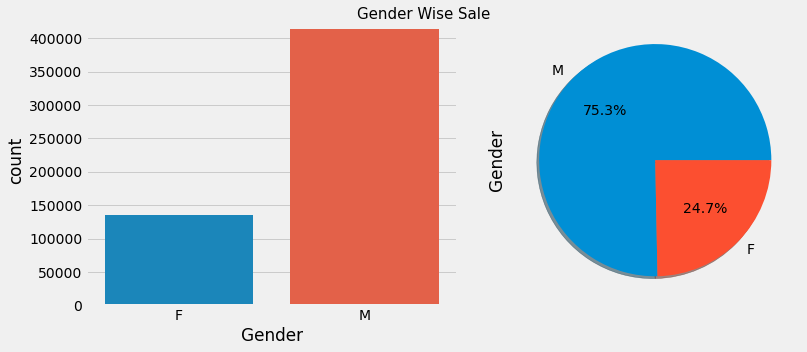

In [25]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
fig.suptitle(walmart_df['Gender'].name+' Wise Sale',fontsize=15)
sns.countplot(walmart_df['Gender'],ax=ax[0])  
walmart_df['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
plt.tight_layout()

**Observations**:
 - As we can clearly see that, there are more no. of males purchasing than females

 **2.Age**

In [26]:
walmart_df['Age'].value_counts()         

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

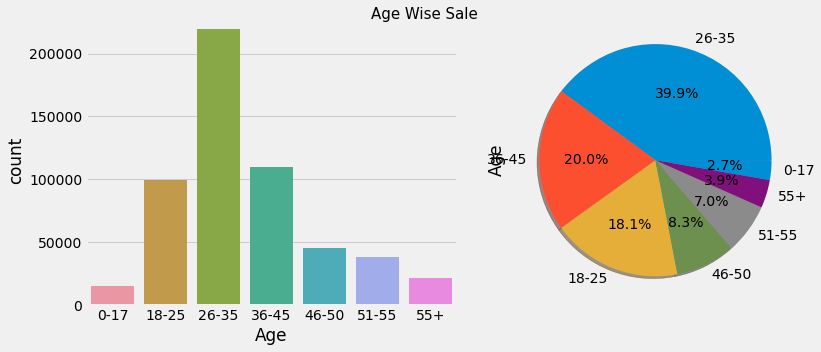

In [27]:
cat_feat(walmart_df['Age'])

**Observations**:
 - As we can clearly see that, the customers/consumers in productive age group of 25-35 years are purchasing the most(39.9%), whereas, the minimalistic age range is 0-17 contributing to only 2.7% of all the walmart items purchased.

 **3.City_Category**

In [28]:
walmart_df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

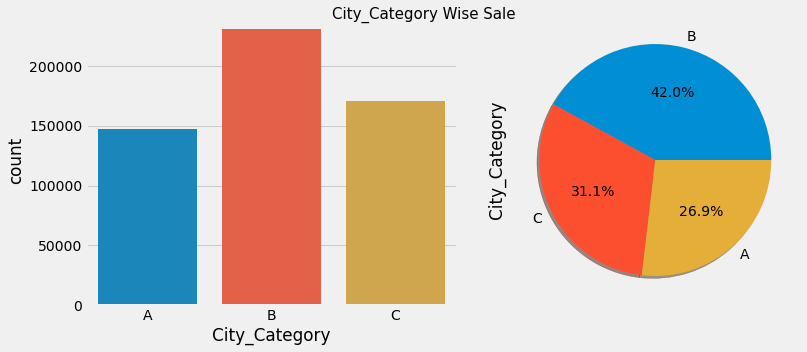

In [29]:
cat_feat(walmart_df['City_Category'])

**Observations**:
 - As we can clearly see that, the customers of city of category 'B' are purchasing the most(42%), whereas the people from City category A are least interested in purchasing from Walmart.
 

 **4.Marital_Status**


In [30]:
walmart_df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [31]:
walmart_df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
walmart_df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [32]:
walmart_df['Marital_Status'].value_counts()

Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

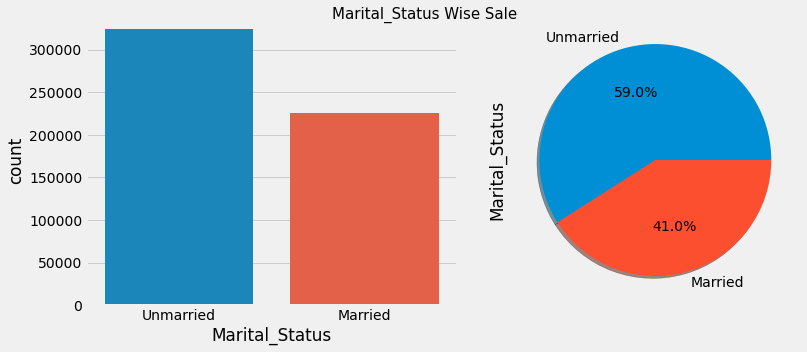

In [33]:
cat_feat(walmart_df['Marital_Status'])

**Observations**:
 - As we can clearly see that, the Unmarried are purchasing more than the Married people.
 
**Inferences**:
 - Walmart management should focus on establishments and infrastructure on B- Category cities, and the target audience for catering user-specific needs should include **Unmarried men in the age froup of 25-35 years belonging to B-categorical cities** in order to gain higher R.O.I.

 # EDA - Bivariate Analysis

In [34]:
walmart_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 21.4+ MB


In [35]:
walmart_df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

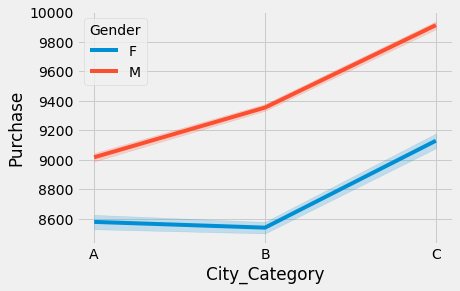

In [36]:
sns.lineplot(x='City_Category',y='Purchase',  data=walmart_df,  hue='Gender')
plt.show()

**Observations**:
 - Both Male and Female  population from Category C cities are purchasing the most. Whereas, females from category B are least interested in purchasing and males from category A cities have shown least interest.


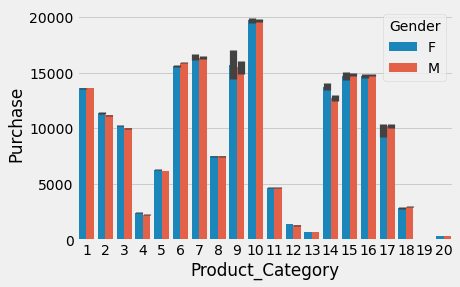

In [37]:
sns.barplot(x='Product_Category',y='Purchase',  data=walmart_df,  hue='Gender')
plt.show()

**Observations**:
 - For Product category no. 4,11,12, 13,18,19, and 20 , the customers seems to be least interested in purchasing

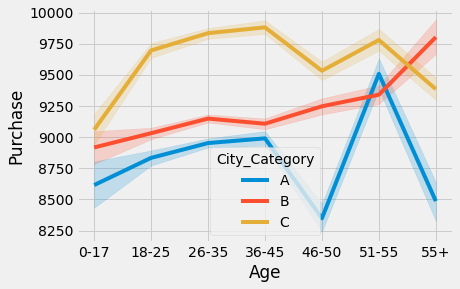

In [38]:
sns.lineplot(x='Age',y='Purchase',  data=walmart_df,  hue='City_Category')
plt.show()

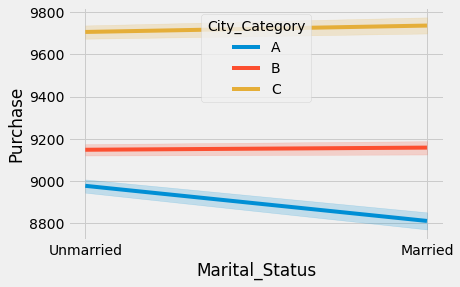

In [39]:
sns.lineplot(x='Marital_Status',y='Purchase',  data=walmart_df,  hue='City_Category')
plt.show()

**Observations**:
 - People from Category C cities seems to be well off and financially good as they are in the higher purchasing groups whereas, people with Age 55+ from B category cities are purching the most from Walmart. People from Category A cities seems to be financially weaker or can be considered as Tier 3 cities where Walmart needs to focus on infrastructure, advertisements and marketing to increase the sale.
 - The married class from these tier 3 cities tends to purchase less from Walmart.


In [40]:
gender_nos = walmart_df.groupby(['Age','Gender'])['Gender'].count()
gender_nos = gender_nos.unstack(level = 'Gender')
print(gender_nos)

Gender      F       M
Age                  
0-17     5083   10019
18-25   24628   75032
26-35   50752  168835
36-45   27170   82843
46-50   13199   32502
51-55    9894   28607
55+      5083   16421


In [41]:
walmart_df.groupby(['Age','Gender'])['Gender'].count()

Age    Gender
0-17   F           5083
       M          10019
18-25  F          24628
       M          75032
26-35  F          50752
       M         168835
36-45  F          27170
       M          82843
46-50  F          13199
       M          32502
51-55  F           9894
       M          28607
55+    F           5083
       M          16421
Name: Gender, dtype: int64

Total purchase by male and female is 
 Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


Text(0, 0.5, 'Total purchase')

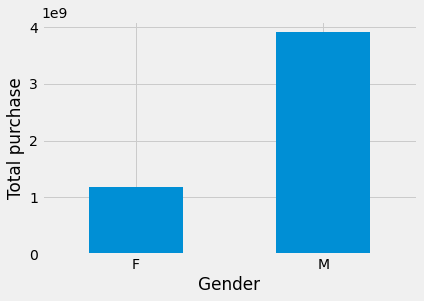

In [42]:
print("Total purchase by male and female is \n",walmart_df.groupby('Gender')['Purchase'].sum())
walmart_df.groupby('Gender')['Purchase'].sum().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel("Total purchase")

Total purchase by various cities is 
 City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64


Text(0, 0.5, 'Total purchase')

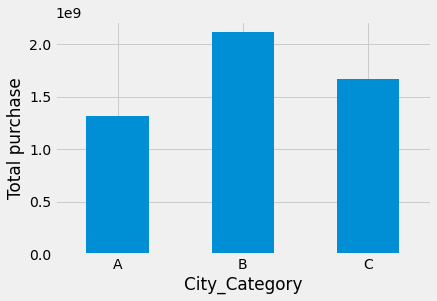

In [43]:
print("Total purchase by various cities is \n",walmart_df.groupby('City_Category')['Purchase'].sum())
walmart_df.groupby('City_Category')['Purchase'].sum().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel("Total purchase")

**Observations**:
 - Overall purchase from Category B cities is the highest of all.

In [44]:
print(round(walmart_df.Stay_In_Current_City_Years.value_counts(normalize = True) *100,2))

1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64


In [45]:
round(walmart_df.Stay_In_Current_City_Years.value_counts(normalize = True)*100,2)

1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64

**Observations**:
 - It is clearly visible that 35% population prefers to stay in a city for almost 1 year.

Gender  City_Category
F       A                 306329915
        B                 493617008
        C                 386285719
M       A                1010141746
        B                1621916597
        C                1277521757
Name: Purchase, dtype: int64


Text(0.5, 0, 'Total purchase')

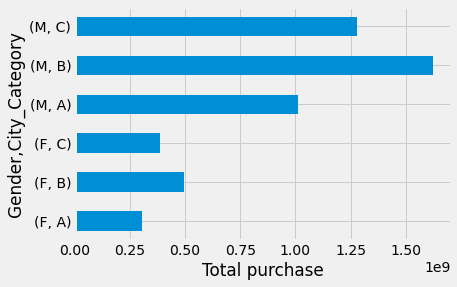

In [46]:
print(walmart_df.groupby(['Gender','City_Category'])['Purchase'].sum())
walmart_df.groupby(['Gender','City_Category'])['Purchase'].sum().plot(kind = 'barh')
plt.xlabel('Total purchase')

**Observations**:
 - Total Purchase done id highest from males from tier 2 cities i.e Category B cities whereas females from tier 3 cities i.e Category A cities tends to puchase the least of all from Walmart


In [48]:
print(walmart_df.groupby(['Stay_In_Current_City_Years','City_Category'])['City_Category'].count().unstack(level = 'City_Category'))

City_Category                   A      B      C
Stay_In_Current_City_Years                     
0                           24178  28687  21533
1                           49305  83413  61103
2                           27114  41772  32952
3                           24804  42691  27790
4+                          22319  34610  27797


**Observations**:
 - More people are living in city category B and they prefer to stay for atleast one year in the city

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Text(0, 0.5, 'Age Range of customers purchasing products')

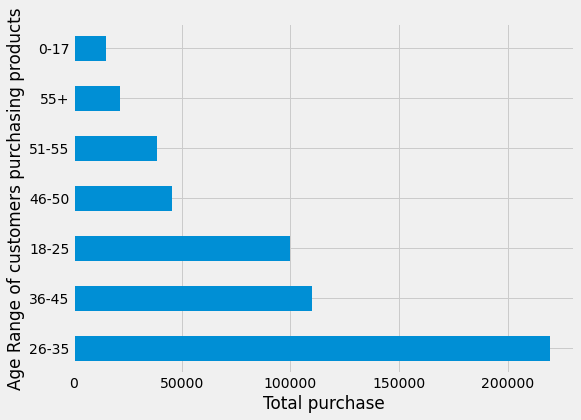

In [49]:
plt.figure(figsize = (8,6))

hist = walmart_df.Age.value_counts()
print(hist)

hist.plot(kind = 'barh')
plt.xlabel('Total purchase')
plt.ylabel('Age Range of customers purchasing products')

**Observations**:
 - As we can clearly see that, the customers/consumers in productive age group of 25-35 years are purchasing the most(39.9%), whereas, the minimalistic age range is 0-17 contributing to only 2.7% of all the walmart items purchased.

 **Analysis on how marital status plays a role on different features of the data.**


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

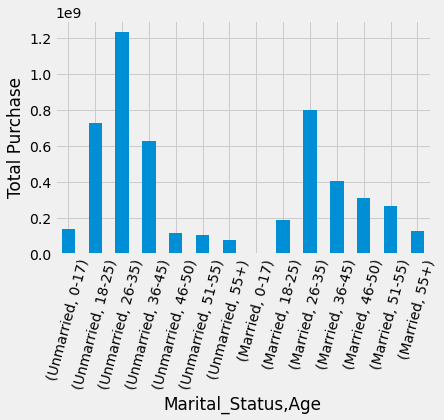

In [52]:
walmart_df.groupby(['Marital_Status','Age'])['Purchase'].sum().plot(kind = 'bar')
plt.ylabel('Total Purchase')
plt.xticks(rotation = 75)

**Observations and Inferences**:
 - Most purchase done is from the age group of 26-35 and unmarried , whereas least is done from unmarried with 55+ age.

In [54]:
walmart_df.groupby(['Marital_Status','Occupation'])['Purchase'].sum()

Marital_Status  Occupation
Unmarried       0             370825372
                1             221595254
                2             130715770
                3              95988995
                4             487595558
                5              71453497
                6             103806681
                7             313327193
                8               6357455
                9              25676420
                10            108779592
                11             64769488
                12            164023062
                13             33349086
                14            151230666
                15             65142251
                16            127031633
                17            222402436
                18             32842665
                19             60186842
                20            151827531
Married         0             264581586
                1             203018890
                2             107312813
             

In [55]:
walmart_df.groupby(['Marital_Status','Occupation'])['Purchase'].sum().unstack(level='Marital_Status')

Marital_Status,Unmarried,Married
Occupation,,
0,370825372,264581586
1,221595254,203018890
2,130715770,107312813
3,95988995,66013173
4,487595558,178648926
5,71453497,42196262
6,103806681,84610103
7,313327193,244044394
8,6357455,8379933


In [57]:
walmart_df.groupby(['Marital_Status','City_Category','Gender'])['Purchase'].count()

Marital_Status  City_Category  Gender
Unmarried       A              F          21827
                               M          69346
                B              F          34527
                               M         102194
                C              F          22467
                               M          74370
Married         A              F          13877
                               M          42670
                B              F          23269
                               M          71183
                C              F          19842
                               M          54496
Name: Purchase, dtype: int64

In [58]:
walmart_df.groupby(['Marital_Status','City_Category','Gender'])['Purchase'].count().unstack(level = 'City_Category')

City_Category              A       B      C
Marital_Status Gender                      
Unmarried      F       21827   34527  22467
               M       69346  102194  74370
Married        F       13877   23269  19842
               M       42670   71183  54496

In [60]:
walmart_df.groupby(['Marital_Status','Stay_In_Current_City_Years','City_Category','Gender'])['Purchase'].count()


Marital_Status  Stay_In_Current_City_Years  City_Category  Gender
Unmarried       0                           A              F          2790
                                                           M         11933
                                            B              F          3824
                                                           M         13775
                                            C              F          2576
                                                           M         10010
                1                           A              F          7045
                                                           M         21571
                                            B              F         13477
                                                           M         35259
                                            C              F          8696
                                                           M         24648
                2                 

In [61]:
walmart_df.groupby(['Marital_Status','Stay_In_Current_City_Years','City_Category','Gender'])['Purchase'].count().unstack(level ='Stay_In_Current_City_Years')

Stay_In_Current_City_Years               0      1      2      3     4+
Marital_Status City_Category Gender                                   
Unmarried      A             F        2790   7045   4957   4621   2414
                             M       11933  21571  13210  11643  10989
               B             F        3824  13477   5331   6593   5302
                             M       13775  35259  19229  18785  15146
               C             F        2576   8696   4283   2968   3944
                             M       10010  24648  13790  13037  12885
Married        A             F        2242   5095   1905   2842   1793
                             M        7213  15594   7042   5698   7123
               B             F        3416   9019   3902   4245   2687
                             M        7672  25658  13310  13068  11475
               C             F        2215   7966   3954   3251   2456
                             M        6732  19793  10925   8534   8512

**Observations**:
 
 - Here occupations 8,9 and 13 has more purchase in married category than unmarried.
 - Male and female from both married and unmarried status if they belongs to city category B then they would spend more.
 - If someone belongs to unmarried,married category and if stays in current city for 1 year then chances of purchase is more as compared to other categories

 # CLT on Purchase done by Gender specific Categorization

In [63]:
print(walmart_df.groupby(['Gender'])['User_ID'].nunique())


Gender
F    1666
M    4225
Name: User_ID, dtype: int64


In [64]:
print(round(walmart_df.groupby(['Gender'])['User_ID'].nunique()/walmart_df['User_ID'].nunique() * 100,2))

Gender
F    28.28
M    71.72
Name: User_ID, dtype: float64


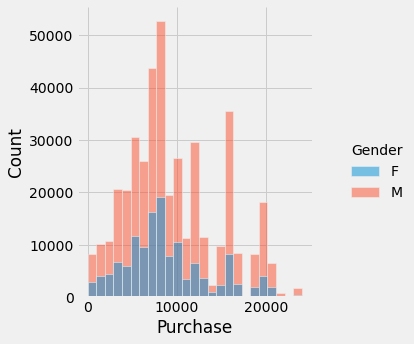

In [65]:
sns.displot(data = walmart_df, x = 'Purchase', hue = 'Gender',bins = 25)
plt.show()

**Observations** : We can clearly see that, no. of females purchasing from walmarts are comaparitively low in count than no. of males.

In [66]:
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [67]:
walmart_df.sample(300).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,68.0,8735.558824,4885.619414,930.0,5091.00,7997.0,11444.75,20869.0
M,232.0,8726.693966,4677.974062,568.0,5281.75,7912.5,11863.00,20928.0


In [70]:
walmart_df_sample1 = walmart_df[walmart_df['Gender'] == 'M']
walmart_df_sample1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686
...,...,...,...,...,...,...,...,...,...,...
550057,1006023,P00370853,M,26-35,0,C,2,Married,19,61
550058,1006024,P00372445,M,26-35,12,A,0,Married,20,121
550060,1006026,P00371644,M,36-45,6,C,1,Married,20,494
550062,1006032,P00372445,M,46-50,7,A,3,Unmarried,20,473


In [71]:
type(walmart_df_sample1)

pandas.core.frame.DataFrame

In [73]:
walmart_df_sample_purchase = walmart_df_sample1['Purchase']
walmart_df_sample_purchase

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [74]:
len(walmart_df_sample_purchase)

414259

In [76]:
walmart_df_sample2 = walmart_df[walmart_df['Gender'] == 'F']
walmart_df_sample2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
14,1000006,P00231342,F,51-55,9,A,1,Unmarried,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,Married,20,599
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


In [77]:
walmart_df_sample_purchase_fem = walmart_df_sample2['Purchase']
walmart_df_sample2


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
14,1000006,P00231342,F,51-55,9,A,1,Unmarried,5,5378
...,...,...,...,...,...,...,...,...,...,...
550061,1006029,P00372445,F,26-35,1,C,1,Married,20,599
550064,1006035,P00375436,F,26-35,1,C,3,Unmarried,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,Married,20,137
550066,1006038,P00375436,F,55+,1,C,2,Unmarried,20,365


In [78]:
len(walmart_df_sample_purchase_fem)

135809

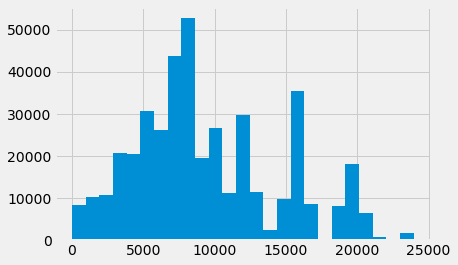

In [79]:
walmart_df_sample_purchase.hist(bins = 25)

**Observations**:
 - As we can see, the above plot is not normal distribution and if we assume it to be normal and do all calculations based on it, it might lead us to wrong conclusion and hence applying CLT to get the sampling distribution of sample means to get a Normal Distribution out of it.


In [80]:
walmart_df_sample_purchase.mean()

9437.526040472265

In [81]:
walmart_df_sample_purchase.std()

5092.186209777949

In [82]:
walmart_df_sample1.shape

(414259, 10)

In [83]:
len(walmart_df_sample_purchase)

414259

So mean lies somewhere in the left side, not symmnetric, it's Right Skewed

 **Bootstrapping**

In [86]:
m = 1000
sample = walmart_df_sample_purchase 
size = 1000 
bs_means = np.empty(m)
bs_means

array([5.87311911e+03, 1.94921466e+04, 4.90136117e+03, 1.41637230e+03,
       5.28306881e+03, 4.27590941e+04, 2.01271371e+03, 1.40273751e+02,
       3.50754008e+04, 5.00641869e+04, 1.40336534e+04, 3.51242580e+03,
       6.27243757e+03, 1.17967234e+04, 1.13450784e+04, 1.87119210e+03,
       9.17137494e+02, 3.86191129e+03, 8.04954609e+02, 4.63743594e+03,
       2.00441256e+04, 1.94254681e+04, 4.30300288e+03, 8.75847453e+03,
       9.05731428e+04, 7.29574014e+04, 1.47386334e+05, 2.49568020e+02,
       1.23950988e+04, 1.10748704e+05, 3.05453219e+00, 1.47203084e+04,
       6.65455687e+04, 1.03424267e+04, 3.99491282e+02, 3.08672225e+03,
       3.91419626e+04, 4.85171844e+03, 4.28628450e+03, 2.94768648e+04,
       9.93121343e+04, 1.16911718e+04, 4.71595071e+01, 2.82894645e+04,
       3.82162314e+04, 7.74827419e+02, 1.79114651e+04, 3.14403801e+03,
       7.64449102e+01, 2.13610730e+04, 8.47669960e+04, 2.07306084e+04,
       1.11615586e+04, 2.77716486e+04, 2.20517386e+04, 5.60996836e+03,
      

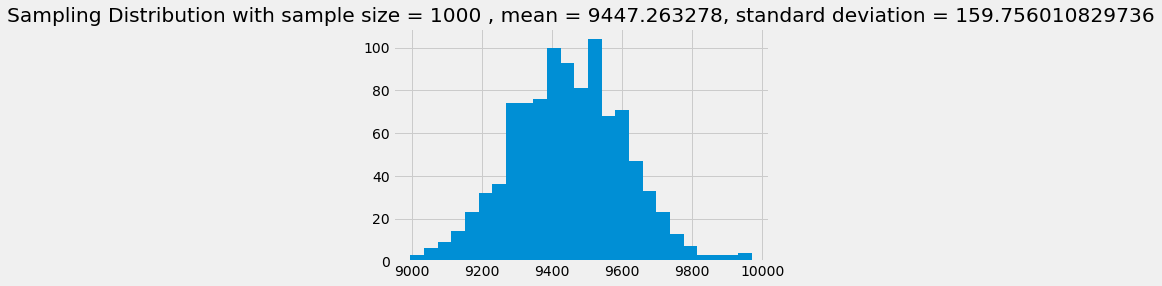

In [85]:
for i in range(m):
    bs_sample = np.random.choice(sample, size = size)
    bs_means[i] = np.mean(bs_sample)
plt.figure()
plt.hist(bs_means, bins = 25)
plt.title(f"Sampling Distribution with sample size = 1000 , mean = {np.mean(bs_means)}, standard deviation = {np.std(bs_means)}")
plt.show()

In [87]:
# for comparison
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


**Effect of n i.e sample size**

In [90]:
m = 1000 # lenth of "sampling distribution of sample means"
sample = walmart_df_sample_purchase
size_list = [1, 5, 10, 20, 30, 100,300, 1000, len(walmart_df_sample_purchase)]

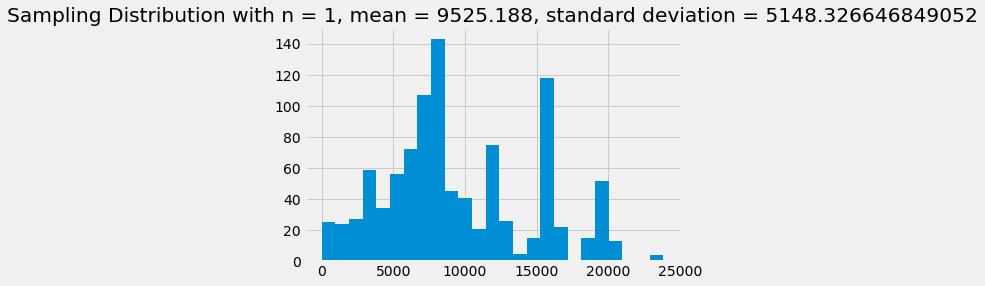

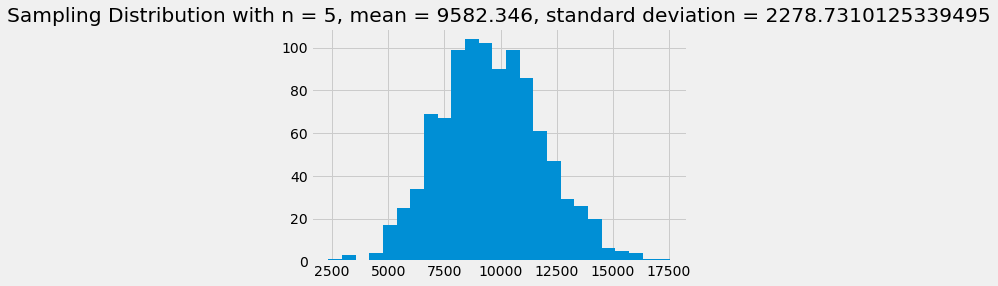

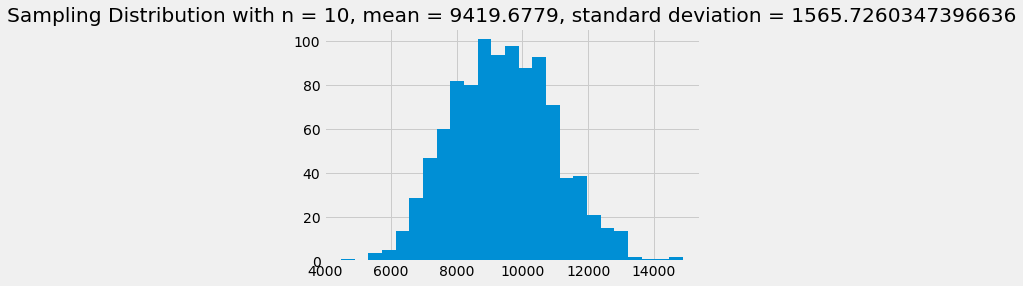

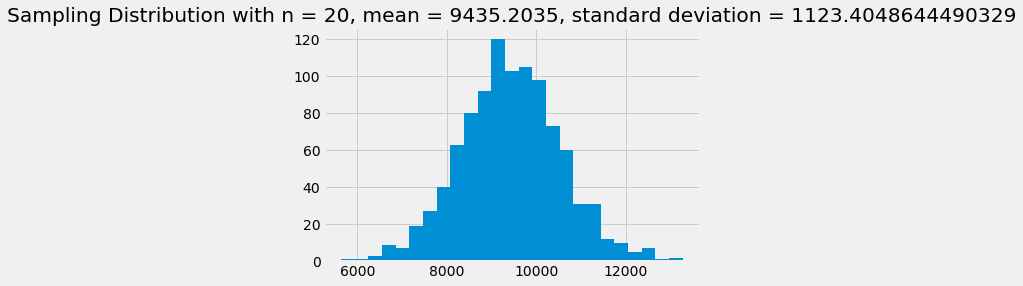

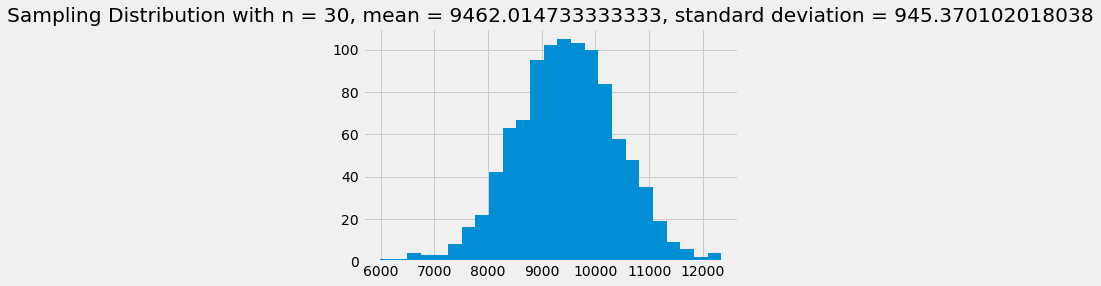

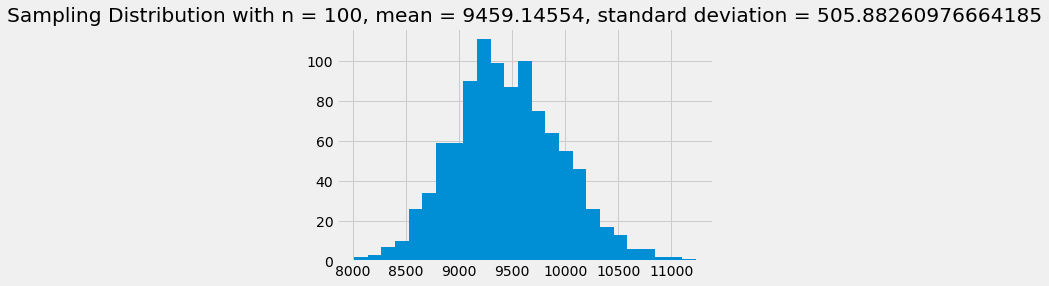

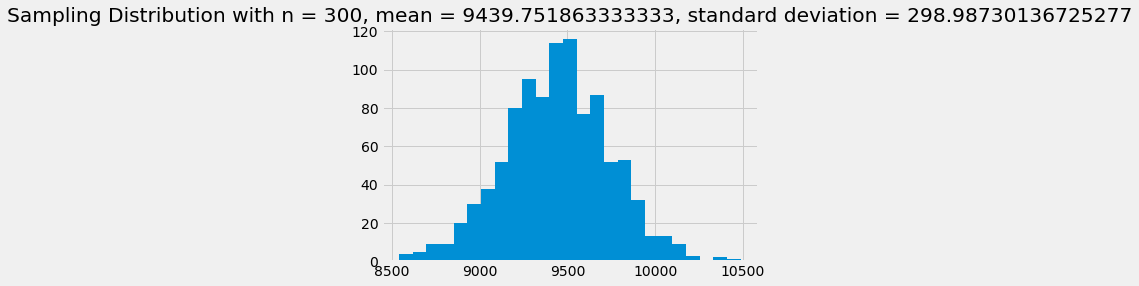

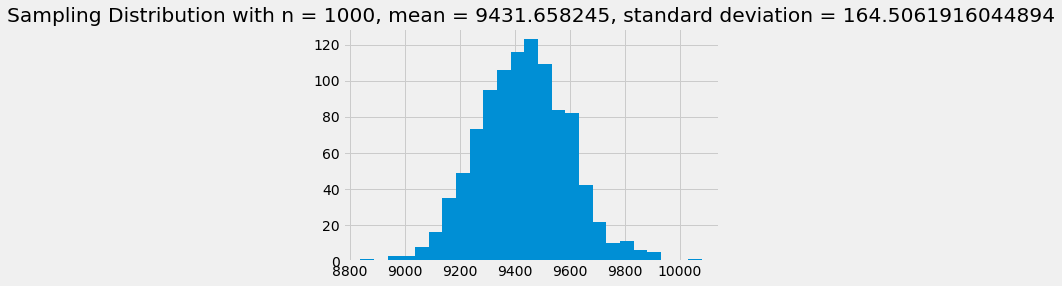

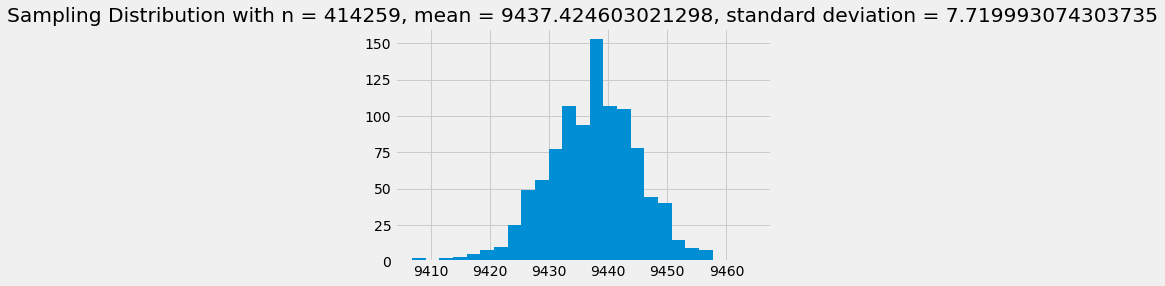

In [91]:
for n in size_list:
    bs_means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        bs_means_n[i] = np.mean(bs_sample_n)
    plt.figure()
    plt.hist(bs_means_n, bins = 25)
    plt.title(f"Sampling Distribution with n = {n}, mean = {np.mean(bs_means_n)}, standard deviation = {np.std(bs_means_n)}")
    plt.show()

**Standard Error**

In [92]:
m = 1000
sample = walmart_df_sample_purchase
size_list = [1, 5, 10, 20, 30, 100, 300, 1000, len(walmart_df_sample_purchase)]


for n in size_list:
    bs_means_n = np.empty(m)
    for i in range(m):
        bs_sample_n = np.random.choice(sample, size = n)
        bs_means_n[i] = np.mean(bs_sample_n)
    print(f"sample size = {n}, Emperical Standard Error = {np.std(bs_means_n)}, Theoretical Standard Error = {np.std(sample)/np.sqrt(n)}")

sample size = 1, Emperical Standard Error = 5140.99304754986, Theoretical Standard Error = 5092.180063635943
sample size = 5, Emperical Standard Error = 2284.6271642594465, Theoretical Standard Error = 2277.292155191835
sample size = 10, Emperical Standard Error = 1602.3462332885456, Theoretical Standard Error = 1610.2887256790739
sample size = 20, Emperical Standard Error = 1150.6532980255, Theoretical Standard Error = 1138.6460775959174
sample size = 30, Emperical Standard Error = 921.7191112455898, Theoretical Standard Error = 929.7006292438327
sample size = 100, Emperical Standard Error = 493.0361586000297, Theoretical Standard Error = 509.2180063635943
sample size = 300, Emperical Standard Error = 308.892336173985, Theoretical Standard Error = 293.99715305022573
sample size = 1000, Emperical Standard Error = 157.44972829622284, Theoretical Standard Error = 161.0288725679074
sample size = 414259, Emperical Standard Error = 8.110544080806118, Theoretical Standard Error = 7.911662926

**Observations**:
 
 - As sample size increases, Standard error (standard deviation of **sampling distribution of sampling means**) decreases. And we want the standard error to be minimized which we have brougt to 8.13 from 5092(org data).
 - Is our sample size big enough ? 
     - As we can see that our **sampling distribution is normally distributed**,after n = 30, but as per the difference in the enpirical standard error and theoritical std erro, we can safey take any sample range from (200 - 600)
     - Checking **confidence intervals, if the range of interval estimates is high**,  we have increased the sample size.


In [94]:
Confidence_95 = np.percentile(bs_means, 97.5) - np.percentile(bs_means, 2.5)
print(f"The avg mean for male population purchasing items from walmart within 95% area (confidence) is {np.percentile(bs_means, 2.5), np.percentile(bs_means, 97.5) }")

The avg mean for male population purchasing items from walmart within 95% area (confidence) is (39.511859467278384, 130285.69847212116)


In [95]:
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [96]:
# Another approach for CLT
walmart_df['Gender'].unique()

[F, M]
Categories (2, object): [F, M]

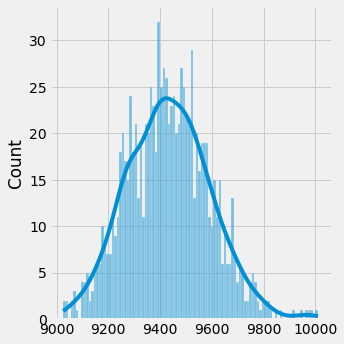

In [98]:
# CLT on Males
male_expense_mean = [walmart_df[walmart_df['Gender'] == 'M']['Purchase'].sample(1000).mean() for i in range(1000)]
sns.displot(male_expense_mean, bins = 100, kde = True)
plt.show()

In [100]:
pd.Series(male_expense_mean).mean()

9433.259821000001

In [101]:
pd.Series(male_expense_mean).std() 
# Std deviation is changed from 5092 to 158 for a sample of 1000

159.47450708007025

In [102]:
# Calculating confidence interval for 90, 95, 99 % Confidence
# For 90% for All men

In [105]:
lower_limit_males = pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*1.28)
lower_limit_males

9229.132451937512

In [106]:
upper_limit_males = pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*1.28)
upper_limit_males

9637.38719006249

In [107]:
lower_limit_males_90 = round(lower_limit_males,2)
upper_limit_males_90 = round(upper_limit_males,2)
lower_limit_males_90,upper_limit_males_90

(9229.13, 9637.39)

**The mean of the purchase done by All Men will lie in the range (9229.13, 9637.39) with 91% confidence**

In [108]:
# For 95% for All men:
lower_limit_males_95 = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*1.96),2)
upper_limit_males_95 = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*1.96),2)
lower_limit_males_95,upper_limit_males_95

(9120.69, 9745.83)

**The mean of the purchase done by All Men will lie in the range (9120.69, 9745.83) with 95% confidence**

In [109]:
# For 99% for All men:
lower_limit_males_99 = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*2.58),2)
upper_limit_males_99 = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*2.58),2)
lower_limit_males_99, upper_limit_males_99

(9021.82, 9844.7)

**The mean of the purchase done by All Men will lie in the range (9021.82, 9844.7) with 99% confidence**

In [110]:
Confidence_Dict_Male = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict_Male.items():
    lower_limit_males = round(pd.Series(male_expense_mean).mean() - (pd.Series(male_expense_mean).std()*value),2)
    upper_limit_males = round(pd.Series(male_expense_mean).mean() + (pd.Series(male_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All Men will lie in the range {lower_limit_males, upper_limit_males} with {key} confidence")

The mean of the purchase done by All Men will lie in the range (9229.13, 9637.39) with 90% confidence
The mean of the purchase done by All Men will lie in the range (9120.69, 9745.83) with 95% confidence
The mean of the purchase done by All Men will lie in the range (9021.82, 9844.7) with 99% confidence


In [113]:
# CLT on Females
female_expense_mean = [walmart_df[walmart_df['Gender'] == 'F']['Purchase'].sample(1000).mean() for i in range(1000)]
female_expense_mean

[9092.989,
 8570.627,
 9091.045,
 8756.482,
 8648.535,
 8888.677,
 8694.385,
 8803.73,
 8815.121,
 8981.195,
 8770.164,
 8800.621,
 8662.328,
 8654.263,
 8525.562,
 8841.775,
 8642.433,
 8611.224,
 8678.113,
 8715.99,
 8854.702,
 9026.448,
 8630.1,
 8343.796,
 8468.38,
 8797.467,
 8628.823,
 8715.539,
 8883.596,
 8473.721,
 8646.426,
 8828.781,
 8797.966,
 8670.258,
 8857.991,
 8618.942,
 8888.891,
 8897.808,
 8873.034,
 8721.867,
 8791.929,
 8889.273,
 8766.67,
 8615.882,
 8611.95,
 8854.927,
 8883.902,
 8590.16,
 8644.006,
 8855.688,
 8772.156,
 8781.03,
 8651.152,
 8830.332,
 8724.529,
 8543.948,
 8640.89,
 8790.792,
 8833.685,
 8990.703,
 8729.881,
 8674.841,
 8536.122,
 8732.122,
 8566.463,
 9042.718,
 8761.4,
 8648.736,
 8690.241,
 8776.616,
 8812.583,
 8540.318,
 8673.354,
 8471.643,
 8621.398,
 8716.289,
 8827.048,
 8825.831,
 8726.092,
 8682.631,
 8784.881,
 8659.901,
 8651.439,
 8969.833,
 8731.704,
 8516.963,
 8926.186,
 8723.128,
 8757.73,
 8479.312,
 8974.171,
 8574.562,
 

In [115]:
len(female_expense_mean)


1000

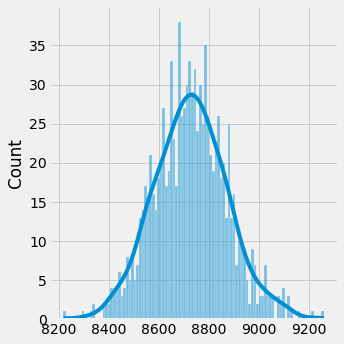

In [116]:
sns.displot(female_expense_mean, bins = 100, kde = True)
plt.show()


In [120]:
pd.Series(female_expense_mean).mean(),pd.Series(female_expense_mean).std()
 # Std deviation is changed from 4767 to 146 

(8728.490059999996, 146.1767558161602)

In [121]:
Confidence_Dict_female = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict_female.items():
    lower_limit_females = round(pd.Series(female_expense_mean).mean() - (pd.Series(female_expense_mean).std()*value),2)
    upper_limit_females = round(pd.Series(female_expense_mean).mean() + (pd.Series(female_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All Females will lie in the range {lower_limit_females, upper_limit_females} with {key} confidence")
    

The mean of the purchase done by All Females will lie in the range (8541.38, 8915.6) with 90% confidence
The mean of the purchase done by All Females will lie in the range (8441.98, 9015.0) with 95% confidence
The mean of the purchase done by All Females will lie in the range (8351.35, 9105.63) with 99% confidence


In [125]:
# Overlap in confidence interval
mu_male = 9443
mu_female = 8737
sd_male = 159
sd_female = 147

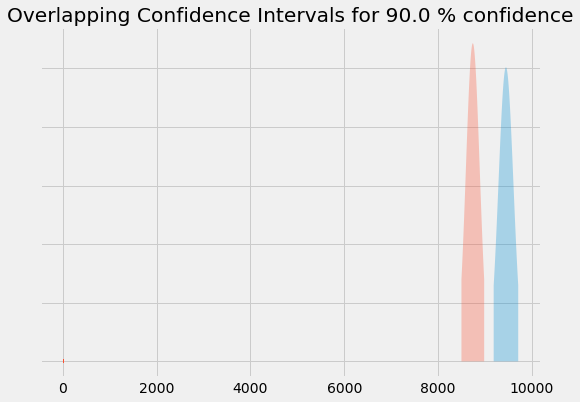

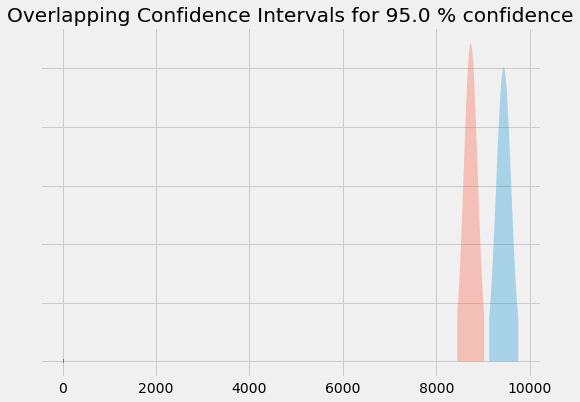

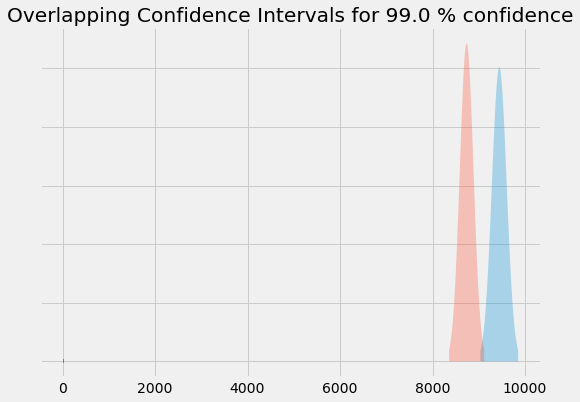

In [126]:
for i in [0.9, 0.95, 0.99]:
    
    ci1 = stats.norm.interval(i, loc=mu_male, scale=sd_male)
    ci2 = stats.norm.interval(i, loc=mu_female, scale=sd_female)

    def returnNormalY(x, mu, sd):
        return 1/(sd * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sd**2))

    # Generate Data for Plot
    # Fill Section
    x1 = np.linspace(ci1[0], ci1[1], 1000)
    y1 = returnNormalY(x1, mu_male, sd_male)
    x2 = np.linspace(ci2[0], ci2[1], 1000)
    y2 = returnNormalY(x2, mu_female, sd_female)
    # Line Section
    x1_line = np.linspace(0, 17)
    y1_line = returnNormalY(x1_line, mu_male, sd_male)
    x2_line = np.linspace(9, 25)
    y2_line = returnNormalY(x2_line, mu_female, sd_female)

    # Generate Plot
    fig, ax = plt.subplots()
    ax.plot(x1_line, y1_line)
    ax.plot(x2_line, y2_line)
    ax.fill_between(x1, y1, alpha=0.3)
    ax.fill_between(x2, y2, alpha=0.3)

    # Plot Editing
    fig.set_size_inches(8, 6, forward=False)
    ax.set_yticklabels([])
    plt.title(f"Overlapping Confidence Intervals for {i *100} % confidence")
    plt.show()

**For sample size is 600 for males and 300 for females**

In [127]:
male_expense_mean = [walmart_df[walmart_df['Gender'] == 'M']['Purchase'].sample(600).mean() for i in range(1000)]
round(pd.Series(male_expense_mean).mean(),2),round(pd.Series(male_expense_mean).std(),2)

(9437.42, 213.45)

In [128]:
female_expense_mean = [walmart_df[walmart_df['Gender'] == 'F']['Purchase'].sample(300).mean() for i in range(1000)]
round(pd.Series(female_expense_mean).mean(),2),round(pd.Series(female_expense_mean).std(),2)

(8727.98, 279.6)

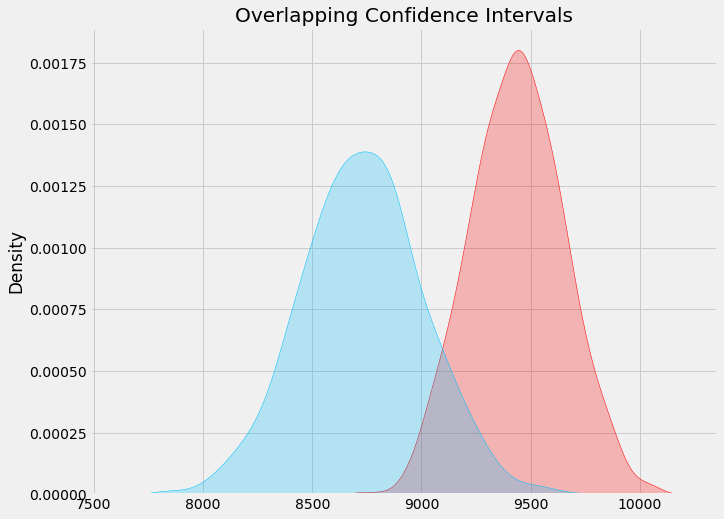

In [129]:
plt.figure(figsize=(10,8))
sns.kdeplot(male_expense_mean,shade=True,color='red')
sns.kdeplot(female_expense_mean,shade=True,color='deepskyblue')
plt.title(f"Overlapping Confidence Intervals")
plt.show()

**Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?**
 - The mean of the purchase done by All Men will lie in the range (9240.93, 9646.92) with 90% confidence
 - The mean of the purchase done by All Men will lie in the range (9133.09, 9754.76) with 95% confidence
 - The mean of the purchase done by All Men will lie in the range (9034.77, 9853.08) with 99% confidence
 - The mean of the purchase done by All Females will lie in the range (8548.93, 8924.63) with 90% confidence
 - The mean of the purchase done by All Females will lie in the range (8449.13, 9024.43) with 95% confidence
 - The mean of the purchase done by All Females will lie in the range (8358.14, 9115.42) with 99% confidence

 **As the confidence percentage inreases, the spread i.e the difference between the upper limit and lower limit also increases.
 Also, we can conclude that, mean purchase done by men is higher than females as we hardly see any overlap, the Walmart management should focus more on individual category and should cater to specific needs for boths categories differently.**
 

 # CLT for Married 

In [130]:
walmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [131]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 21.4+ MB


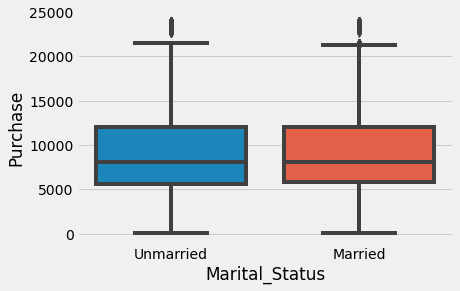

In [132]:
# 0 - Unmarried
# 1 - Married
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = walmart_df)
plt.show()

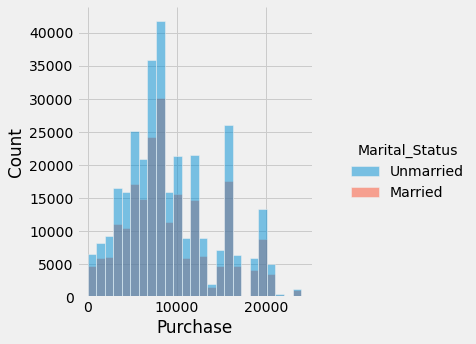

In [133]:
sns.displot(data = walmart_df, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [134]:
walmart_df[walmart_df['Marital_Status'] == 0]['Purchase']

Series([], Name: Purchase, dtype: int64)

In [135]:
walmart_df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Unmarried,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [142]:
#unmarried_expense_mean = [walmart_df[walmart_df['Marital_Status'] == 0]['Purchase'].sample(200).mean() for i in range(1000)]
#sns.displot(unmarried_expense_mean, bins = 100, kde = True)
#plt.show()

In [141]:
#pd.Series(unmarried_expense_mean).mean(),pd.Series(unmarried_expense_mean).std() 

In [144]:
#married_expense_mean = [walmart_df[walmart_df['Marital_Status'] == 1]['Purchase'].sample(200).mean() for i in range(1000)]
#sns.displot(married_expense_mean, bins = 100, kde = True)
#plt.show()

In [145]:
#pd.Series(married_expense_mean).mean(),pd.Series(married_expense_mean).std() 

In [148]:
'''
Confidence_Dict = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}
for key,value in Confidence_Dict.items():
    lower_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() - (pd.Series(unmarried_expense_mean).std() *value),2)
    upper_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() + (pd.Series(unmarried_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All unmarried singles will lie in the range {lower_limit_unmarried, upper_limit_unmarried} with {key}")
    
for key,value in Confidence_Dict.items():
    lower_limit_married = round(pd.Series(married_expense_mean).mean() - (pd.Series(married_expense_mean).std() *value),2)
    upper_limit_married = round(pd.Series(married_expense_mean).mean() + (pd.Series(married_expense_mean).std()*value),2)
    print(f"The mean of the purchase done by All married couples will lie in the range {lower_limit_married, upper_limit_married} with {key}")
'''

'\nConfidence_Dict = {"90%" : 1.28, "95%" : 1.96, "99%" : 2.58}\nfor key,value in Confidence_Dict.items():\n    lower_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() - (pd.Series(unmarried_expense_mean).std() *value),2)\n    upper_limit_unmarried = round(pd.Series(unmarried_expense_mean).mean() + (pd.Series(unmarried_expense_mean).std()*value),2)\n    print(f"The mean of the purchase done by All unmarried singles will lie in the range {lower_limit_unmarried, upper_limit_unmarried} with {key}")\n    \nfor key,value in Confidence_Dict.items():\n    lower_limit_married = round(pd.Series(married_expense_mean).mean() - (pd.Series(married_expense_mean).std() *value),2)\n    upper_limit_married = round(pd.Series(married_expense_mean).mean() + (pd.Series(married_expense_mean).std()*value),2)\n    print(f"The mean of the purchase done by All married couples will lie in the range {lower_limit_married, upper_limit_married} with {key}")\n'

In [150]:
'''
plt.figure(figsize=(10,8))
sns.kdeplot(married_expense_mean,shade=True,color='red')
sns.kdeplot(unmarried_expense_mean,shade=True,color='deepskyblue')
plt.show()
'''

"\nplt.figure(figsize=(10,8))\nsns.kdeplot(married_expense_mean,shade=True,color='red')\nsns.kdeplot(unmarried_expense_mean,shade=True,color='deepskyblue')\nplt.show()\n"

Conclusion: 
 - The mean of the purchase done by All unmarried singles will lie in the range (8801.38, 9736.18) with 90%
 - The mean of the purchase done by All unmarried singles will lie in the range (8553.07, 9984.49) with 95%
 - The mean of the purchase done by All unmarried singles will lie in the range (8326.67, 10210.88) with 99%
 - The mean of the purchase done by All married couples will lie in the range (8825.36, 9727.32) with 90%
 - The mean of the purchase done by All married couples will lie in the range (8585.78, 9966.91) with 95%
 - The mean of the purchase done by All married couples will lie in the range (8367.34, 10185.35) with 99%
 
# CLT for Age


In [151]:
walmart_df['Age'].unique()

[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Categories (7, object): [0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]

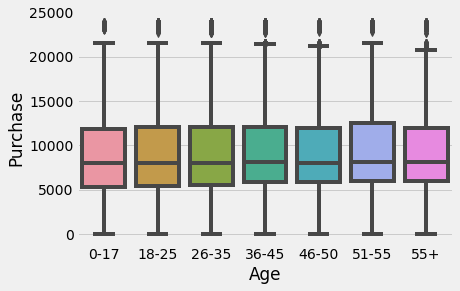

In [152]:
sns.boxplot(x = 'Age', y = 'Purchase', data = walmart_df)
plt.show()

In [153]:
walmart_df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


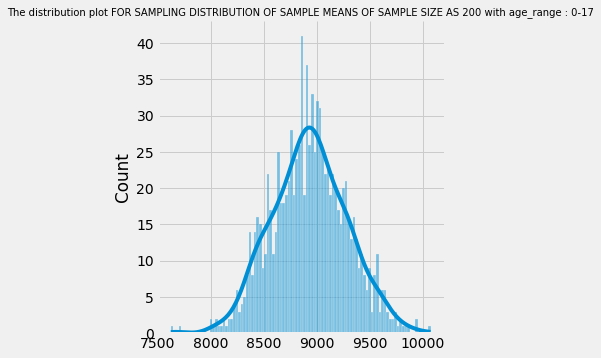

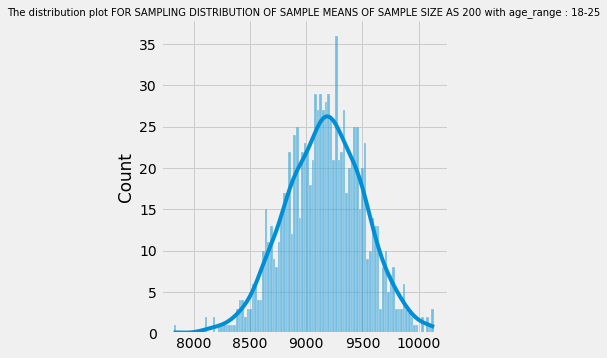

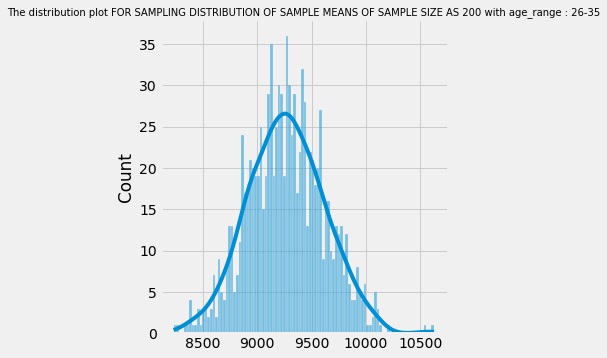

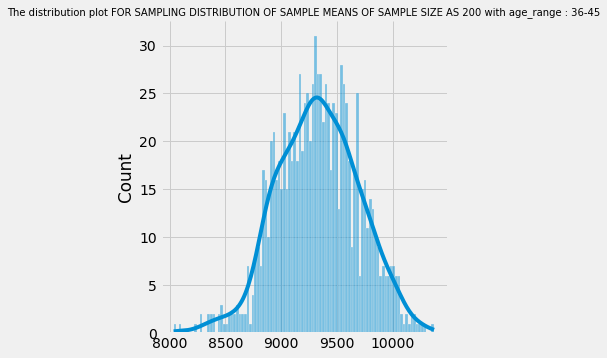

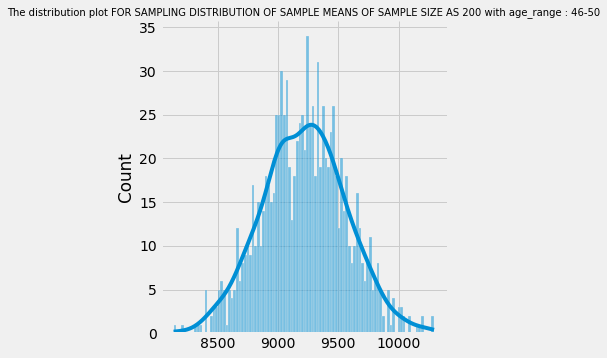

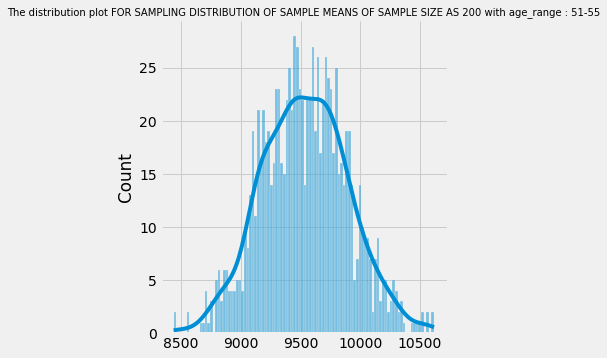

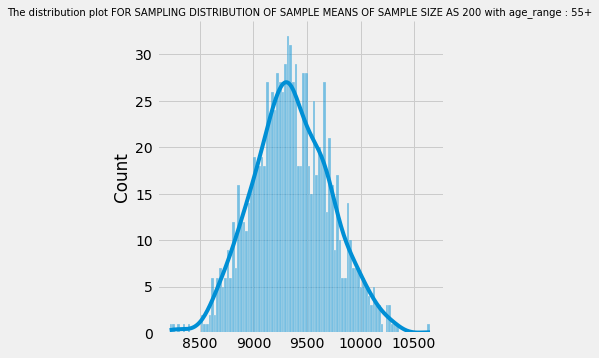

In [154]:
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in age_list:
    age_Range_Expense_Mean = [walmart_df[walmart_df['Age'] == i]['Purchase'].sample(200).mean() for j in range(1000)]
    sns.displot(age_Range_Expense_Mean, bins = 100, kde = True)
    plt.title(f"The distribution plot FOR SAMPLING DISTRIBUTION OF SAMPLE MEANS OF SAMPLE SIZE AS 200 with age_range : {i}", size = 10)
    plt.show()

In [155]:
age_dict = {}
for i in walmart_df['Age'].unique():
    x = "purchase_mean"+i
    age_dict[x] = [walmart_df[walmart_df['Age'] == i]['Purchase'].sample(200).mean() for j in range(1000)]

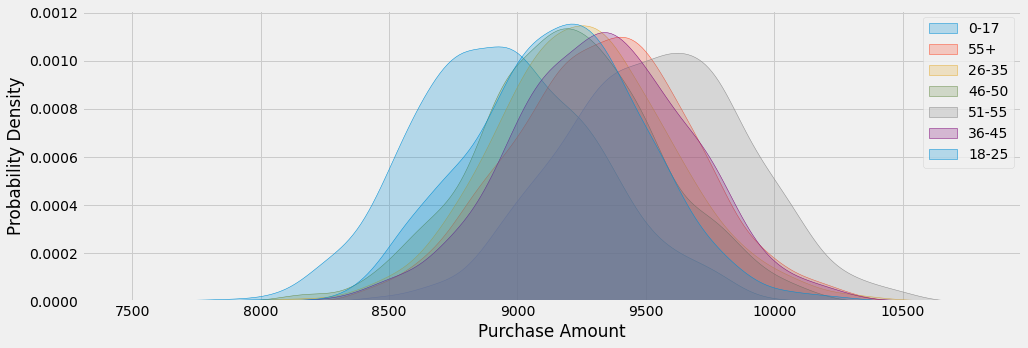

In [156]:
plt.figure(figsize = (15,5))
for i in age_dict.keys():
    x = i.strip('purchase_mean')
    sns.kdeplot(age_dict[i], shade = True, label = x)
plt.legend()
plt.xlabel('Purchase Amount')
plt.ylabel('Probability Density')
plt.show()

There's no spending behavioral chnage in married and unmarried people in spending habits in Walmart. The management should treat both the categories equally and rather not spend time and resources in categorization of married / unmaaried as well as he age groups of people byuing as we can see a huge overlap between thenw.r.t purchasing power. 
